# 5. 상관 분석

## 5-1. SQL 데이터 불러오기

In [1]:
import pymysql.cursors
import pandas as pd
import numpy as np

In [2]:
conn = pymysql.connect(host='localhost', user='root', 
                       password='3756', db='mydata', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:
    with conn.cursor() as curs:
        sql = "select * from dataset4;"
        curs.execute(sql)
        rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음
        df = pd.DataFrame(rs)
        
finally:
    conn.close()
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",,,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90,"Cumings, Mrs. Florence Briggs (n챕e Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865,"Heikkinen, Miss Laina",26.0,"Jyv채skyl채, Finland",Southampton,New York City,14?,,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127,"Futrelle, Mrs. Lily May (n챕e Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,,,3


## 5-2. 문자열 숫자로 변경하기
여성 : 1, 남성 0

In [3]:
df['Sex'].replace({'female':1, 'male':0}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,S,691,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",,,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,90,"Cumings, Mrs. Florence Briggs (n챕e Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865,"Heikkinen, Miss Laina",26.0,"Jyv채skyl채, Finland",Southampton,New York City,14?,,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,S,127,"Futrelle, Mrs. Lily May (n챕e Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,S,627,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,,,3


## 5-3. 분석할 변수 가져오기

In [4]:
M = df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
M.head()

,Survived,Age,SibSp,Parch,Fare,Sex
0,0.0,22.0,1,0,7.2500,0
1,1.0,38.0,1,0,71.2833,1
2,1.0,26.0,0,0,7.9250,1
3,1.0,35.0,1,0,53.1000,1
4,0.0,35.0,0,0,8.0500,0


## 5-4. 상관 계수 구하기

In [5]:
M.corr()

,Survived,Age,SibSp,Parch,Fare,Sex
Survived,1.000000,-0.077221,-0.017358,0.093317,0.268189,0.538826
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.017358,-0.308247,1.000000,0.383820,0.138329,0.103950
Parch,0.093317,-0.189119,0.383820,1.000000,0.205119,0.246972
Fare,0.268189,0.096067,0.138329,0.205119,1.000000,0.184994
Sex,0.538826,-0.093254,0.103950,0.246972,0.184994,1.000000


## 5-5. 시각화

In [6]:
import seaborn as sns

<AxesSubplot:>

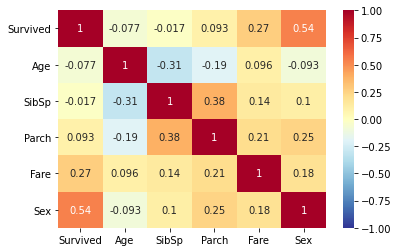

In [7]:
sns.heatmap(M.corr(),
            annot = True, # 값을 표시
            cmap = 'RdYlBu_r', 
            vmin=-1, vmax=1)

# 6. 데이터 분석 및 시각화

참고 : https://statinknu.tistory.com/14

## b. 성별에 따른 생존률

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
survived = df.groupby('Sex').sum()['Survived']
survived

Sex
0     93.0
1    197.0
Name: Survived, dtype: float64

In [10]:
n_passengers = df.groupby('Sex').size()
n_passengers

Sex
0    453
1    261
dtype: int64

In [11]:
survived_rate = survived / n_passengers
survived_rate

Sex
0    0.205298
1    0.754789
dtype: float64

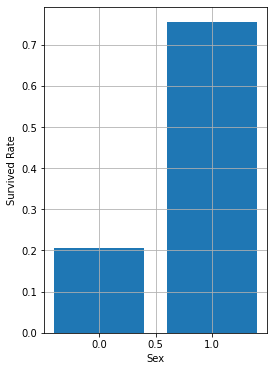

In [12]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(111)

ax.bar(survived_rate.index, survived_rate)

ax.set_xlabel('Sex')
ax.set_ylabel('Survived Rate')
ax.grid(True)

plt.show()

## c. 연령에 따른 생존율

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,S,691,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",,,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,90,"Cumings, Mrs. Florence Briggs (n챕e Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865,"Heikkinen, Miss Laina",26.0,"Jyv채skyl채, Finland",Southampton,New York City,14?,,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,S,127,"Futrelle, Mrs. Lily May (n챕e Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,S,627,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,,,3


In [15]:
# df_survived_rate = df.groupby('Age').sum()['Survived'] / df.groupby('Age').size()
# df_survived_rate.head()
df.groupby('Age').sum()['Survived']

Age
0.42     1.0
0.67     1.0
0.75     2.0
0.83     2.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

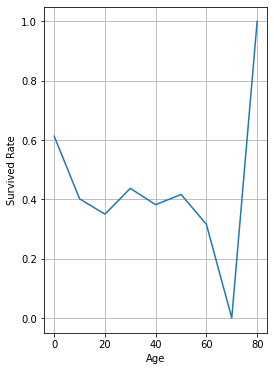

In [112]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(111)

ax.plot(df_survived_rate.index, df_survived_rate)

ax.set_xlabel('Age')
ax.set_ylabel('Survived Rate')
ax.grid(True)

plt.show()

## d. 연령, 성별에 따른 생존율

In [113]:
df_survived_rate2 = df.groupby(['Age_Band', 'Sex']).sum()['Survived'] / df.groupby(['Age_Band', 'Sex']).size()
df_survived_rate2

Age_Band  Sex
0         0      0.593750
          1      0.633333
10        0      0.122807
          1      0.755556
20        0      0.168919
          1      0.722222
30        0      0.214953
          1      0.833333
40        0      0.210526
          1      0.687500
50        0      0.133333
          1      0.888889
60        0      0.133333
          1      1.000000
70        0      0.000000
80        0      1.000000
dtype: float64

## e. 모델 생성

In [72]:
from scipy import stats
import statsmodels.formula.api as smf

### 회귀직선

In [73]:
formula = 'Survived ~ Age + Sex'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     146.0
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           7.77e-54
Time:                        22:45:34   Log-Likelihood:                -382.61
No. Observations:                 714   AIC:                             771.2
Df Residuals:                     711   BIC:                             784.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2336      0.038      6.101      0.000       0.158       0.309
Age           -0.0009      0.001     -0.858      0.391      -0.003       0.001
Sex            0.5469      0.032     16.910      0.000       0.483       0.610
==============================================================================
Omnibus:                       15.657   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.304
Skew:                           0.360   Prob(JB):                     0.000288
Kurtosis:                       2.829   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Logistic Regression

In [75]:
formula = 'Survived ~ Age + Sex'
result = smf.logit(formula, df).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.525180
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.2225
Time:                        22:51:32   Log-Likelihood:                -374.98
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.565e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1886      0.222     -5.344      0.000      -1.625      -0.753
Age           -0.0054      0.006     -0.860      0.390      -0.018       0.007
Sex            2.4659      0.185     13.302      0.000       2.103       2.829
==============================================================================
"""